In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Why did we choose this dataset for visualization? \\
We selected the Netflix dataset for our dashboard project to gain insights into the platform’s content trends and viewer preferences. As a global leader in streaming, Netflix offers a diverse catalog that reflects changing demands across genres, countries, and age ratings. Through visualization, we aim to explore key patterns, such as the growth of different content types, shifts in popular genres, and age rating distributions. By presenting these insights interactively,  dashboard will enable users to discover how Netflix adapts its offerings to meet global viewing trends and provides a data-driven look at its evolving content strategy.


# Mục mới

### 1.Loading Data

In [ ]:
netflix_df = pd.read_excel("/content/netflix_titles.xlsx")
netflix_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


### 2.About Data

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_minutes  4267 non-null   object 
 1   duration_seasons  1971 non-null   object 
 2   type              6235 non-null   object 
 3   title             6235 non-null   object 
 4   date_added        6223 non-null   object 
 5   release_year      6234 non-null   float64
 6   rating            6223 non-null   object 
 7   description       6233 non-null   object 
 8   show_id           6232 non-null   float64
dtypes: float64(2), object(7)
memory usage: 438.6+ KB


duration_minutes : Movie duration \\
duration_seasons : Seasonal movies have many seasons \\
type             : Movie Type \\
title	           :  Movie name \\
date_added	     : Date added to Netflix \\
release_year	 : Release year \\
rating	         : Recommended viewer age for content \\
description	     : Introduce \\
show_id          : ID \\

#### Check missing value and duplicate




In [ ]:
# Find duplicate rows
duplicates = netflix_df[netflix_df.duplicated()]

# Display duplicate rows if any
print("Number of duplicate rows:", duplicates.shape[0])

Number of duplicate rows: 0


In [ ]:
duplicates.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id


In [ ]:
missing_values = netflix_df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

,0
duration_minutes,1969
duration_seasons,4265
type,1
title,1
date_added,13
release_year,2
rating,13
description,3
show_id,4


##### Fill other missing values at columns 'rating','description'

In [ ]:
netflix_df['rating'] = netflix_df['rating'].fillna("Unrated")
netflix_df['description'] = netflix_df['description'].fillna("No description available")

##### Fill 'duration_minutes'




Before trying to fill, let's take a look at the data

In [ ]:
df1 = netflix_df[netflix_df['duration_minutes'].isnull()]

In [ ]:
df1.head(5)

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
5,NaN,1,TV Show,Apaches,2017-09-08 00:00:00,2016.0,TV-MA,A young journalist is forced into a life of cr...,80163890.0
8,NaN,1,TV Show,Fire Chasers,2017-09-08 00:00:00,2017.0,TV-MA,"As California's 2016 fire season rages, brave ...",80117902.0
26,NaN,1,TV Show,Castle of Stars,2018-09-07 00:00:00,2015.0,TV-14,As four couples with different lifestyles go t...,80244601.0


As you can see, all 1969 null 'duration_mintues' values ​​have type 'TV Show'. This is worth analyzing, so we leave it as is.

##### Fill 'duration_seasons'




Let's see the data together

In [ ]:
df2 = netflix_df[netflix_df['duration_seasons'].isnull()]
df2.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0
6,110,NaN,Movie,Automata,2017-09-08 00:00:00,2014.0,R,"In a dystopian future, an insurance adjuster f...",70304989.0
7,60,NaN,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08 00:00:00,2017.0,TV-MA,Fabrizio Copano takes audience participation t...,80164077.0


In [ ]:
df2['type'].unique()

array(['Movie'], dtype=object)

In [ ]:
df2.shape

(4265, 9)

All 'Movie' types do not have 'duration_seasons', which is understandable since movies do not have seasons. Therefore, we will fill null 'duration_seasons' = 0

In [ ]:
# Fill missing values in the 'duration_season' column with 0
netflix_df['duration_seasons'] = netflix_df['duration_seasons'].fillna(0)

In [ ]:
netflix_df.isnull().sum()

,0
duration_minutes,1969
duration_seasons,0
type,1
title,1
date_added,13
release_year,2
rating,0
description,0
show_id,4


In [ ]:
netflix_df[netflix_df['show_id'].isnull()]

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
2017,40,0,Movie,The Memphis Belle: A Story of a,NaN,NaN,Unrated,No description available,NaN
2018,"Flying Fortress""",2017-03-31 00:00:00,1944,TV-PG,This documentary centers on the crew of the B-...,80119194.0,Unrated,No description available,NaN
4524,87,0,Movie,The Bad Education Movie,2018-12-15 00:00:00,2015.0,TV-MA,Britain's most ineffective but caring teacher ...,NaN
4525,"and probably will.""",80188902,NaN,NaN,NaN,NaN,Unrated,No description available,NaN


Line 2017 and line 4525 contain too many NaNs so this line will be deleted

In [ ]:
netflix_df = netflix_df.drop([2017,4525])

The 2018 line is in the wrong place so we need to put it back in its right place.

In [ ]:
netflix_df.iloc[2018]

,2019
duration_minutes,NaN
duration_seasons,1
type,TV Show
title,The Murder Detectives
date_added,2017-03-31 00:00:00
release_year,2015.0
rating,TV-MA
description,This series tracks the ups and downs of an 18-...
show_id,80179057.0


In [ ]:
import warnings

warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [ ]:
# 2018
entry = netflix_df.iloc[2017]
des = entry['description']
entry['duration_minutes'] = 45    # Search Google
entry['duration_seasons'] = 0
entry['show_id'] = np.nan
entry['title'] = 'Flying Fortress'
entry['date_added'] = "2017-03-31 00:00:00"
entry['release_year'] = 1944
entry['type'] = "Movie"
entry['rating'] = "TV-PG"
entry['description'] = des

netflix_df.iloc[2017] = entry

In [ ]:
netflix_df.iloc[2017]

,2018
duration_minutes,45
duration_seasons,0
type,Movie
title,Flying Fortress
date_added,2017-03-31 00:00:00
release_year,1944.0
rating,TV-PG
description,No description available
show_id,NaN


In [ ]:
netflix_df.isnull().sum()

,0
duration_minutes,1969
duration_seasons,0
type,0
title,0
date_added,11
release_year,0
rating,0
description,0
show_id,2


In [ ]:
df4 = netflix_df[netflix_df['show_id'].isnull()]
df4

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
2018,45,0,Movie,Flying Fortress,2017-03-31 00:00:00,1944.0,TV-PG,No description available,NaN
4524,87,0,Movie,The Bad Education Movie,2018-12-15 00:00:00,2015.0,TV-MA,Britain's most ineffective but caring teacher ...,NaN


#### Merge

In [ ]:
to_drop = netflix_df[netflix_df['show_id'].isna()].index

netflix_df.drop(to_drop, inplace=True, axis=0)
netflix_df['show_id'] = netflix_df['show_id'].astype(int)

In [ ]:
show_id = netflix_df['show_id'].astype(int).tolist()

In [ ]:
mapping_table = {
    'director': 'netflix_titles_directors',
    'cast': 'netflix_titles_cast',
    'country': 'netflix_titles_countries',
    'listed_in': 'netflix_titles_category'
}
for key in mapping_table:
    sheet = pd.read_excel("netflix_titles.xlsx", sheet_name = mapping_table[key])
    tmp = []
    for id in show_id:
        query_result = sheet[sheet['show_id'] == id][key].tolist()
        if len(query_result) == 0:
            tmp.append(np.nan)
        else:
            tmp.append(query_result)
    netflix_df[key] = tmp



In [ ]:
netflix_df.head(10)

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,cast,country,listed_in
0,90,0,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628,"[Richard Finn, Tim Maltby]","[Alan Marriott, Jennifer Cameron, Lee Tockar, ...","[United States, China, India, South Korea]","[Children & Family Movies, Comedies]"
1,94,0,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401,NaN,[Jandino Asporaat],[United Kingdom],[Stand-Up Comedy]
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439,NaN,"[Peter Cullen, Kevin Michael Richardson, Josh ...",[United States],[Kids' TV]
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654,NaN,"[Will Friedle, Mitchell Whitfield, Ted McGinle...",[United States],[Kids' TV]
4,99,0,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979,[Fernando Lebrija],"[Nesta Cooper, Alicia Sanz, Kid Ink, Jake Bore...",[United States],[Comedies]
5,NaN,1,TV Show,Apaches,2017-09-08 00:00:00,2016.0,TV-MA,A young journalist is forced into a life of cr...,80163890,NaN,"[Alberto Ammann, Claudia Traisac, Eloy Azorín,...",[Spain],"[Crime TV Shows, International TV Shows, Spani..."
6,110,0,Movie,Automata,2017-09-08 00:00:00,2014.0,R,"In a dystopian future, an insurance adjuster f...",70304989,[Gabe Ibáñez],"[Antonio Banderas, Robert Forster, Tim McInner...","[Bulgaria, Canada, United States, Spain]","[International Movies, Sci-Fi & Fantasy, Thril..."
7,60,0,Movie,Fabrizio Copano: Solo pienso en mi,2017-09-08 00:00:00,2017.0,TV-MA,Fabrizio Copano takes audience participation t...,80164077,"[Rodrigo Toro, Francisco Schultz]",[Fabrizio Copano],[Chile],[Stand-Up Comedy]
8,NaN,1,TV Show,Fire Chasers,2017-09-08 00:00:00,2017.0,TV-MA,"As California's 2016 fire season rages, brave ...",80117902,NaN,NaN,[United States],"[Docuseries, Science & Nature TV]"
9,90,0,Movie,Good People,2017-09-08 00:00:00,2014.0,R,A struggling couple can't believe their luck w...,70304990,[Henrik Ruben Genz],"[James Franco, Sam Spruell, Thomas Arnold, Ann...","[United States, Sweden, United Kingdom, Denmark]","[Action & Adventure, Thrillers]"


In [ ]:
netflix_df.shape

(6232, 13)

In [ ]:
netflix_df.isnull().sum()

,0
duration_minutes,1969
duration_seasons,0
type,0
title,0
date_added,11
release_year,0
rating,0
description,0
show_id,0
director,1969


In [ ]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['duration_seasons'] = pd.to_numeric(netflix_df['duration_seasons'], errors='coerce')
netflix_df['duration_minutes'] = pd.to_numeric(netflix_df['duration_minutes'], errors='coerce')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6232 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_minutes  4263 non-null   float64       
 1   duration_seasons  6232 non-null   int64         
 2   type              6232 non-null   object        
 3   title             6232 non-null   object        
 4   date_added        6221 non-null   datetime64[ns]
 5   release_year      6232 non-null   float64       
 6   rating            6232 non-null   object        
 7   description       6232 non-null   object        
 8   show_id           6232 non-null   int64         
 9   director          4263 non-null   object        
 10  cast              5663 non-null   object        
 11  country           5756 non-null   object        
 12  listed_in         6232 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 810.7+ KB


In [ ]:
netflix_df.to_excel('merged_netflix_titles.xlsx', index=False)

In [ ]:
netflix_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,cast,country,listed_in
0,90.0,0,Movie,Norm of the North: King Sized Adventure,2019-09-09,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628,"[Richard Finn, Tim Maltby]","[Alan Marriott, Jennifer Cameron, Lee Tockar, ...","[United States, China, India, South Korea]","[Children & Family Movies, Comedies]"
1,94.0,0,Movie,Jandino: Whatever it Takes,2016-09-09,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401,NaN,[Jandino Asporaat],[United Kingdom],[Stand-Up Comedy]
2,NaN,1,TV Show,Transformers Prime,2018-09-08,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439,NaN,"[Peter Cullen, Kevin Michael Richardson, Josh ...",[United States],[Kids' TV]
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654,NaN,"[Will Friedle, Mitchell Whitfield, Ted McGinle...",[United States],[Kids' TV]
4,99.0,0,Movie,#realityhigh,2017-09-08,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979,[Fernando Lebrija],"[Nesta Cooper, Alicia Sanz, Kid Ink, Jake Bore...",[United States],[Comedies]


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6232 entries, 0 to 6235
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_minutes  4263 non-null   float64       
 1   duration_seasons  6232 non-null   int64         
 2   type              6232 non-null   object        
 3   title             6232 non-null   object        
 4   date_added        6221 non-null   datetime64[ns]
 5   release_year      6232 non-null   float64       
 6   rating            6232 non-null   object        
 7   description       6232 non-null   object        
 8   show_id           6232 non-null   int64         
 9   director          4263 non-null   object        
 10  cast              5663 non-null   object        
 11  country           5756 non-null   object        
 12  listed_in         6232 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 810.7+ KB


### 3.EDA

#### Analyze 'duration_minutes' and 'duration_seasons'

##### Descriptive statistics

In [ ]:
netflix_df['duration_minutes'].describe()

,duration_minutes
count,4263.000000
mean,99.117523
std,28.066231
min,3.000000
25%,86.000000
50%,98.000000
75%,115.000000
max,312.000000


Some observations about the duration of movies on Netflix through the variable 'duration_minutes':
- The average duration of a movie on Netflix is ​​99 minutes with a standard deviation of about 28 minutes.
- Movie duration ranges from 3 minutes to 312 minutes.
- The median duration (i.e. the value in the middle) is about 99 minutes, while the majority of movies have a duration of about 86 minutes to 115 minutes (25th and 75th percentiles, respectively).

In [ ]:
netflix_df['duration_seasons'].describe()

,duration_seasons
count,6232.000000
mean,0.562259
std,1.232279
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,15.000000


Comments on the number of seasons of TV shows through the variable duration_seasons:
- The average number of seasons of shows is 1.78 seasons with a median of 1, which shows that Netflix prioritizes producing shows with short series or only 1 season.
- 75% of shows have 2 seasons or less, reflecting Netflix's focus on short and accessible series.
- The largest number of seasons is 15 seasons, however these are exceptions, accounting for a very small percentage of the entire dataset.

##### In-depth analysis

Text(0, 0.5, 'Frequency')

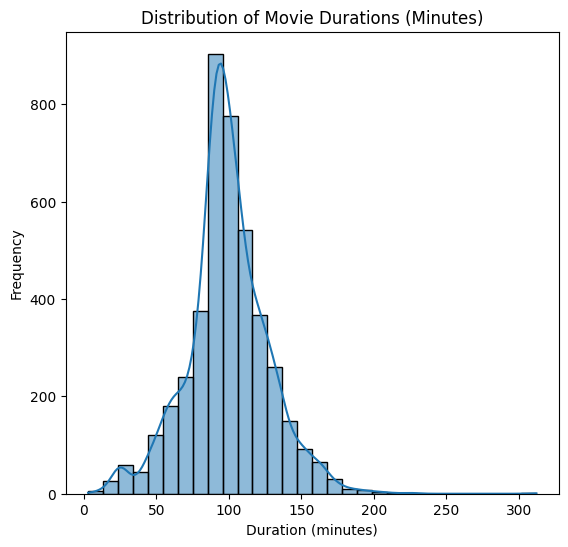

In [ ]:
# Plot histogram cho biến duration_minutes:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(netflix_df['duration_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Durations (Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

Most movies have a duration of 90-120 minutes with a peak of 100 minutes. This shows that **the standard duration of movies on Netflix is ​​often not too long, suitable for the habits of most audiences today**, convenient for viewers, helping them easily watch a movie in one sitting without having to divide it into parts. From there, movie producers can build a movie production plan with a suitable duration, which **not only meets the needs of most audiences but also optimizes production costs**. Maintaining the production and release of films with a regular duration of 90-120 minutes helps **increase the ability to attract and retain viewers, while minimizing the risk of unnecessary lengthening, avoiding losing the appeal of the content.**

**=> This trend also shows a change in the entertainment industry, as producers increasingly focus on flexible and optimized viewing experiences, meeting the needs of busy audiences who want to have a complete entertainment experience in a short period of time.**

Text(0.5, 0, 'Duration (seasons)')

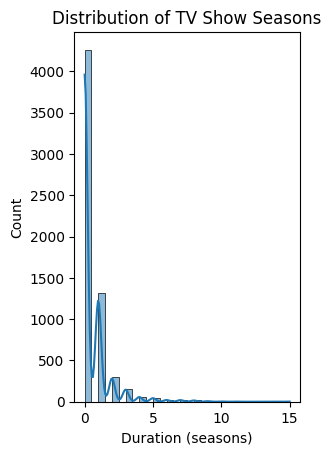

In [ ]:
# Plot histogram cho biến duration_seasons:
plt.subplot(1, 2, 2)
sns.histplot(netflix_df['duration_seasons'], bins=30, kde=True)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Duration (seasons)')

For the number of seasons of **TV shows (duration_seasons)**, the distribution chart shows that the majority of shows have only **1** to **2** seasons, reflecting a trend toward producing short series or limited series to meet viewers’ demand for quick, concise entertainment. Shows with 1 to 2 seasons easily attract viewers due to their flexibility and efficiency; audiences don’t have to wait for a new series as everything is wrapped up in one, increasing the program's appeal. **Only a small number of shows have more than 2 seasons**, with **the highest being 15 seasons**, which may represent **standout series** or **those with a loyal viewership**, but these are exceptions.








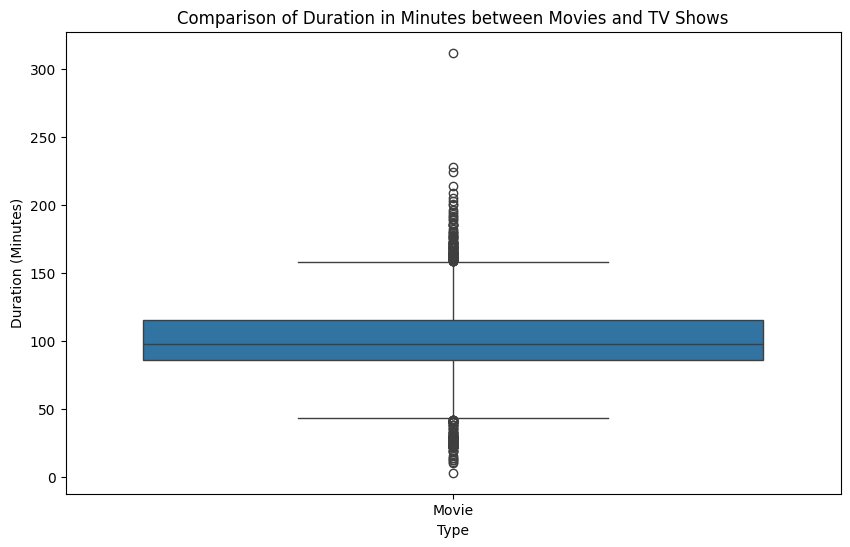

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=netflix_df.dropna(subset=['duration_minutes']), x='type', y='duration_minutes')
plt.title("Comparison of Duration in Minutes between Movies and TV Shows")
plt.xlabel("Type")
plt.ylabel("Duration (Minutes)")
plt.show()

The box plot comparing the duration of movies and TV shows shows that movies generally have a longer and more variable duration. The average duration of movies is around 100 minutes, with some exceeding 200 minutes, indicated by outliers. In contrast, TV shows have a narrower duration range, demonstrating consistency in episode length. This reflects the structured format of TV episodes compared to the flexible length of movies.

#### Type, Ratings Analysis

In [ ]:
netflix_df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'Unrated', 'UR', 'NC-17'], dtype=object)

Explain about the ratings in the table

1. TV-Y: Suitable for children of all ages. Mild content, safe for young children.

2. TV-Y7: Suitable for children 7 years and older. Content may have elements of adventure or mild action, but is not scary.

3. TV-Y7-FV: Similar to TV-Y7 but with additional elements of fantasy violence (Fantasy Violence), may have fantasy action scenes but is suitable for children 7 years and older.

4. TV-G: For all ages. Healthy content, no sensitive elements or violence.

5. TV-PG: Parental supervision is recommended. Content may have some sensitive elements or mild language not suitable for young children.

6. TV-14: Not suitable for children under 14 years old. Content may contain violence, strong language, or mild emotional elements, suitable for teens and up.

7. TV-MA: Mature Audience Only. Content may contain violence, sex, strong language, not suitable for people under 17 years old.

8. G: All ages can watch. Usually healthy movies, suitable for children and families.

9. PG: Movies with parental supervision. May contain strong language, violence, or mild emotional elements, suitable for children 10 years old and up.

10. PG-13: Not recommended for children under 13 years old. Content may contain violence, strong language, or emotional elements, suitable for teens and up.

11. R: Restricted, only for people 17 years old and up. Content may contain strong violence, sexuality, or strong language.

12. NC-17: Not intended for people under 17. Content may contain strong violence, sexuality, or strong language, not suitable for young audiences.

13. NR: Not Rated, possibly because it is a documentary, independent film, or international release that has not passed the country's rating system.

##### Compare ratings of 2 different types

In [ ]:
# 1. Count of each type with respect to rating
type_rating_counts = netflix_df.groupby(['type', 'rating']).size().unstack(fill_value=0)
type_rating_counts

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR,Unrated
type,,,,,,,,,,,,,,,
Movie,36,2,202,183,286,506,1038,80,1347,431,41,69,27,7,8
TV Show,1,0,16,1,0,2,660,69,679,269,102,100,68,0,2


<Figure size 1400x700 with 0 Axes>

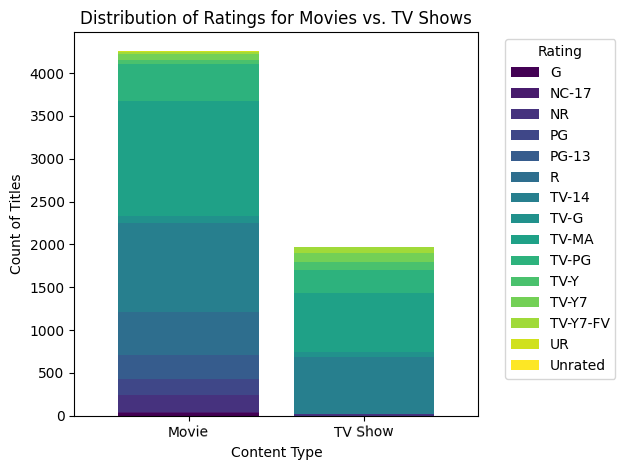

In [ ]:
# 2. Plotting the distribution of ratings for Movies vs TV Shows
plt.figure(figsize=(14, 7))
type_rating_counts.plot(kind='bar', stacked=True, colormap="viridis", width=0.8)
plt.title("Distribution of Ratings for Movies vs. TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count of Titles")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

The stacked bar chart shows the distribution of content ratings across movies and TV shows. **Movies have a broader range of ratings**, with a significant portion in mature categories like TV-MA and R, **while TV shows have a more balanced distribution across ratings suitable for both general and mature audiences**. This distribution suggests that **Netflix's movie catalog includes more adult-oriented content**, while **TV shows cater to a wider audience demographic, including children and family-friendly options**.

Netflix could focus on **expanding its family-friendly movie selection** to create a more balanced catalog for viewers of all ages. Increasing the **variety of ratings within TV shows**, especially by adding more content for **younger audiences**, could also attract more **family subscriptions**. Additionally, Netflix might consider **promoting its content by rating categories** to help users quickly find shows or movies suitable for their **age group or preference.** This targeted approach can enhance user satisfaction by making it easier to discover appropriate content.

#### Comparison between Movies and TV Shows

<ipython-input-34-b575af961a40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, x='type', palette='viridis')


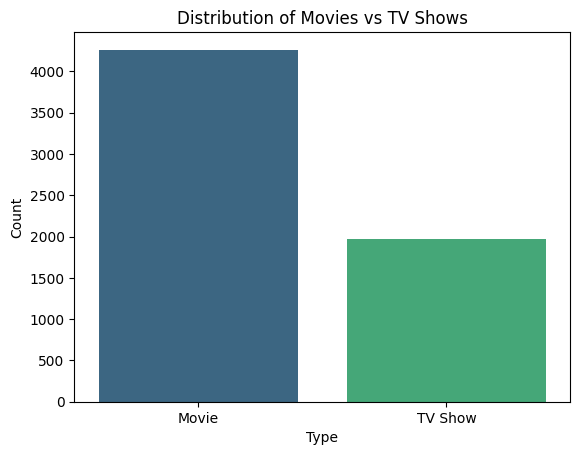

In [ ]:
# Count plot for 'type' column
sns.countplot(data=netflix_df, x='type', palette='viridis')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


The analysis reveals that Netflix's catalog consists of **4,000** movies (**66.7%**) and **2,000** TV shows (**33.3%**), showing a stronger focus on movies, likely due to their shorter production times and appeal for one-time viewing. However, TV shows remain significant, catering to viewers who prefer longer, episodic content.

Netflix has a higher ratio of movies to **TV shows**, reflecting a focus on shorter, easily consumable content.
TV shows still play a crucial role, offering longer engagement for viewers.

To enhance the balance of Netflix's content offering, Netflix could consider increasing investment in TV shows by producing more compelling series that attract long-term viewer engagement. Conducting viewer research will provide valuable insights to tailor content based on audience preferences, improving the quality and appeal of TV shows. Additionally, implementing a targeted marketing strategy focused on promoting **new series** could raise awareness and encourage viewers to explore episodic content, potentially increasing viewership. Campaigns that recommend TV shows based on viewer interests could further personalize the experience, fostering greater loyalty. Regular performance analysis of TV shows will enable Netflix to make informed decisions on future investments or adjustments to its content strategy, ensuring a blend that appeals to diverse audience segments.

#### Movie release frequency by year

1.   List item
2.   List item



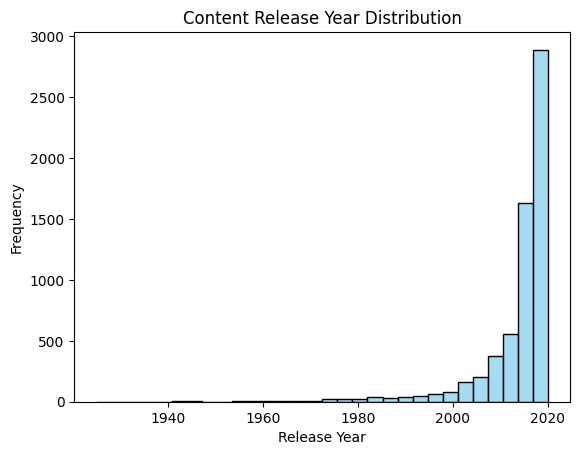

In [ ]:
# Histogram of release years
sns.histplot(data=netflix_df, x='release_year', bins=30, color='skyblue')
plt.title('Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


The distribution chart of content release years reveals a **slow growth in releases from 1980 to 2000**, followed by a sharp **increase from 2000 to 2020**. This significant rise in recent years reflects the expanding demand for entertainment content, driven by advancements in digital streaming platforms and changing viewer habits.

To capitalize on this growth trend, **Netflix could focus on investing in more diverse and high-quality content to meet the increasing demand for fresh releases**. Emphasizing original productions and exploring new genres may attract a wider audience. Additionally, analyzing viewer preferences across various time periods **could guide Netflix in identifying successful content types and planning future releases**. By aligning its content strategy with audience trends, **Netflix can better cater to the growing appetite for entertainment and sustain its competitive edge in the streaming market**.

#### Movie content suitable for all ages



<ipython-input-36-f26b9247c3f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=netflix_df, y='rating', order=netflix_df['rating'].value_counts().index, palette='viridis')


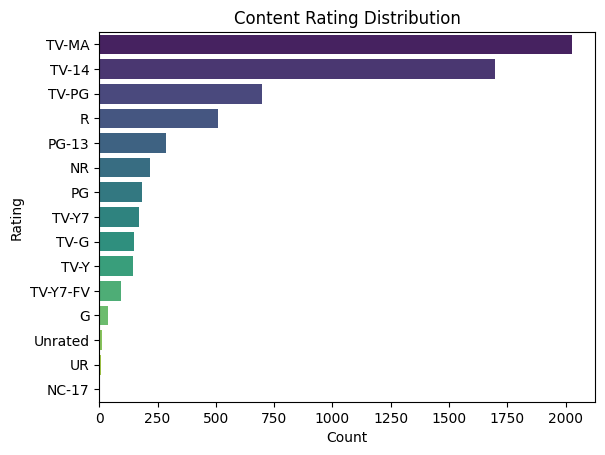

In [ ]:
# Count plot for content ratings
sns.countplot(data=netflix_df, y='rating', order=netflix_df['rating'].value_counts().index, palette='viridis')
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


The content rating distribution chart shows that the majority of Netflix's catalog is rated **TV-MA**, followed by **TV-14**. This suggests that Netflix's content is **largely geared towards mature audiences, with a significant amount of content suitable for teens and adults.** The **lower count of content with child-friendly ratings, such as TV-Y or TV-G, indicates a stronger focus on adult-oriented programming.**

To attract a broader audience, **Netflix could consider increasing its offerings of family-friendly and children’s content, balancing its catalog to cater to all age groups**. **Developing and promoting more PG-rated and kid-friendly series can attract households with young viewers**, potentially expanding Netflix’s subscriber base. Additionally, Netflix could enhance its **recommendation algorithms to better personalize content suggestions based on age-appropriate preferences**, ensuring that families and individual viewers alike can easily discover content that aligns with their viewing needs.

#### Number of Films released each month

In [ ]:
# Ensure 'date_added' is in datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract month from 'date_added'
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# Count films added per month
films_per_month = netflix_df['month_added'].value_counts().sort_index()

# Display the month with the highest count
most_films_month = films_per_month.idxmax()
most_films_count = films_per_month.max()

print(f"Month with the most films added: {most_films_month} (Total: {most_films_count})")
films_per_month


Month with the most films added: 12.0 (Total: 695)


,count
month_added,
1.0,610
2.0,378
3.0,550
4.0,447
5.0,428
6.0,393
7.0,474
8.0,509
9.0,479


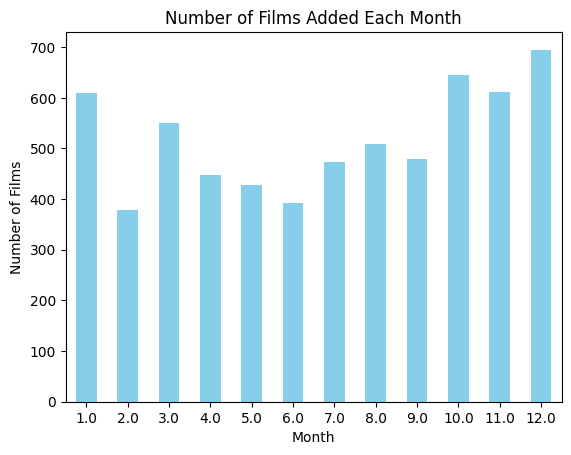

In [ ]:
# Plot the number of films added per month
films_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Films Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.xticks(rotation=0)
plt.show()


The bar chart shows the number of films added to Netflix each month, with noticeable peaks in the months of **November and December**. This indicates a trend where **Netflix increases its content releases towards the end of the year**, likely to attract holiday viewers. The distribution remains relatively steady throughout other months, with slight variations.

Netflix could consider maintaining or even boosting its end-of-year content additions to capitalize on high holiday viewership. Additionally, Netflix may want to explore opportunities to release exclusive or high-demand content during other times of the year to balance subscriber engagement across all months. By strategically planning content releases, Netflix can sustain consistent viewer interest and attract new subscribers year-round.

#### Analysis year_added

In [ ]:
netflix_df['year_added'] = [a.year for a in netflix_df['date_added'].tolist()]

In [ ]:
netflix_df.groupby('year_added')['show_id'].nunique()

,show_id
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,7
2013.0,12
2014.0,25
2015.0,90
2016.0,456


We can see that, the highest number of movie added into Netflix in a single year is 2,349, and it is during 2019.

The first few years has little films due to Netflix being new to streaming during this time. The trend is ever increasing since then.
2020 sees a sharp decrease, this is most likely due to the dataset being cut off early in 2020, let's see when was it cut off.

**How about movie and tv show trends over time?**

In [ ]:
tmp = netflix_df.groupby(['year_added', 'type'])['show_id'].count()
all_years = sorted(netflix_df['year_added'].unique()[:-1])
all_types = ['Movie', 'TV Show']
full_index = pd.MultiIndex.from_product([all_years, all_types], names=['year_added', 'type'])
tmp = tmp.reindex(full_index, fill_value=0).reset_index()
tmp = tmp.sort_values(by=['year_added', 'type']).dropna()
tmp.head()

,year_added,type,show_id
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2009.0,TV Show,0
4,2010.0,Movie,1


In [ ]:
movie_trend = tmp[tmp['type'] == 'Movie']['show_id']
tv_trend = tmp[tmp['type'] == 'TV Show']['show_id']

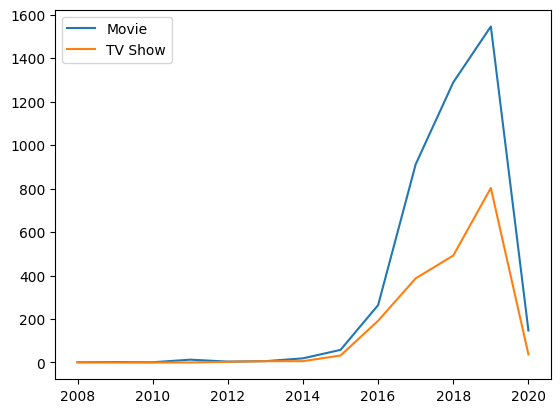

In [ ]:
plt.plot(all_years, movie_trend, label='Movie')
plt.plot(all_years, tv_trend, label='TV Show')
plt.legend()
plt.show()

Movie always seem to be added more annually than TV Shows. This can be explained by the fact that movies are quicker to produce, less costly, and can appeal to a wide range of audiences in shorter viewing times.
Compared to TV Shows, which can span across mutliple seasons.

Other than that, they follow a similar trend of ever-increasing as the platform expands and globalizes.


**How about the shows' genre? What has become popular in the recent years?**

In [ ]:
import ast

def safe_literal_eval(x):
    """Safely evaluate a string as a Python literal, returning the original value if evaluation fails."""
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        # If ast.literal_eval fails, return the original value
        return x

netflix_df['listed_in'] = netflix_df['listed_in'].apply(safe_literal_eval)

In [ ]:
netflix_df['listed_in']

,listed_in
0,"[Children & Family Movies, Comedies]"
1,[Stand-Up Comedy]
2,[Kids' TV]
3,[Kids' TV]
4,[Comedies]
...,...
6231,"[TV Action & Adventure, TV Comedies, TV Sci-Fi..."
6232,[TV Comedies]
6233,[Movies]
6234,"[British TV Shows, TV Comedies, TV Dramas]"


In [ ]:
netflix_df['year_added'] = [a.year for a in netflix_df['date_added'].tolist()]

In [ ]:
netflix_df.groupby('year_added')['show_id'].nunique()

,show_id
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,7
2013.0,12
2014.0,25
2015.0,90
2016.0,456


In [ ]:
tmp = netflix_df.explode('listed_in').groupby(['year_added', 'listed_in'])['show_id'].count().sort_values(ascending=False).reset_index()
tmp = tmp.sort_values(by=['year_added', 'show_id'], ascending=True)
best_per_year = tmp.loc[tmp.groupby('year_added')['show_id'].idxmax()]

In [ ]:
best_per_year

,year_added,listed_in,show_id
247,2008.0,Thrillers,1
244,2009.0,International Movies,1
241,2010.0,Horror Movies,1
135,2011.0,Dramas,13
207,2012.0,Kids' TV,3
192,2013.0,TV Dramas,4
164,2014.0,Documentaries,8
133,2015.0,Documentaries,13
38,2016.0,International TV Shows,93
5,2017.0,International Movies,455


#### Titles Analysis

In [ ]:
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk

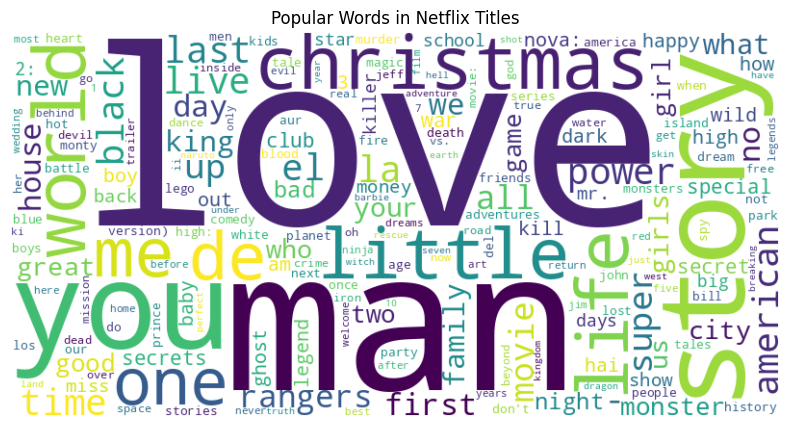

In [ ]:
stop_words = set([
    "the", "and", "of", "in", "a", "to", "is", "it", "for", "on", "with",
    "this", "that", "an", "by", "from", "as", "at", "or", "about", "be", "are","&","my","i","2"
])
titles = netflix_df['title'].dropna().apply(str).str.lower()
all_words = [word for word in ' '.join(titles).split() if word not in stop_words]
word_counts = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Words in Netflix Titles")
plt.show()

- Popular Themes: Words like "love," "story," and "life" suggest a strong focus on emotional and personal narratives, common in drama and romance genres.

- Character Types: Terms such as "man," "girl," "family," and "rangers" indicate frequent references to relatable characters and family-oriented roles.

- Seasonal Content: The prominence of "Christmas" highlights Netflix’s focus on holiday-themed content.

- Adventure and Action: Words like "super," "power," and "adventure" show a strong presence of action and fantasy content.

- Mystery and Supernatural: Terms such as "ghost," "monster," and "magic" point to the popularity of mystery and supernatural genres.

- Cultural Appeal: Words like "American" reflect a mix of U.S.-based and internationally appealing stories.

Insights
1. **Popularity of love and family themes**: The words "love", "family", and "life" appear prominently, indicating that audiences tend to be interested in emotional and intimate topics in life.
2. **Interest in festivals and special seasons**: The word "Christmas" stands out, indicating that content related to the holiday season is highly appealing.
3. **Popularity of action and adventure themes**: Words such as "power", "war", and "world" indicate that action and adventure content is also highly appealing.

 Actions
1. **Increase emotional-themed content**: Invest in movies and TV shows revolving around the themes of love, family, and life to meet viewers' tastes.
2. **Develop seasonal content**: Specially produce and promote programs related to Christmas and holidays to take advantage of the special interest during these occasions. 3. **Expand action and adventure content**: Increase the release of movies and programs about action, war and adventure to attract a large number of viewers who love this genre.

#### Analyze 'Director','Cast'

In [ ]:
def list_to_string(value):
    if isinstance(value, list):
        return ', '.join(value)  # Nối các phần tử của list bằng dấu phẩy
    else:
        return str(value)  # Nếu không phải list, giữ nguyên giá trị

netflix_df = netflix_df.applymap(list_to_string)
netflix_df[['director', 'cast', 'country', 'listed_in']].head()


<ipython-input-57-e01e6c19d02d>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  netflix_df = netflix_df.applymap(list_to_string)


,director,cast,country,listed_in
0,"Richard Finn, Tim Maltby","Alan Marriott, Jennifer Cameron, Lee Tockar, J...","United States, China, India, South Korea","Children & Family Movies, Comedies"
1,nan,Jandino Asporaat,United Kingdom,Stand-Up Comedy
2,nan,"Peter Cullen, Kevin Michael Richardson, Josh K...",United States,Kids' TV
3,nan,"Will Friedle, Mitchell Whitfield, Ted McGinley...",United States,Kids' TV
4,Fernando Lebrija,"Nesta Cooper, Alicia Sanz, Kid Ink, Jake Borel...",United States,Comedies


Number of directors appearing in the dataset

In [ ]:
len(netflix_df['director'].explode().dropna().unique())

3300

Top 10 most popular directors

In [ ]:
netflix_df['director'] = netflix_df['director'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
netflix_df_clean = netflix_df.dropna(subset=['director'])
netflix_df_clean['director'] = netflix_df_clean['director'].apply(lambda x: [director.strip() for director in x.split(',')] if isinstance(x, str) else [])
directors_exploded = netflix_df_clean.explode('director')
directors_exploded['director'].value_counts().head(10)

,count
director,
nan,1969
Jan Suter,21
Raúl Campos,19
Marcus Raboy,14
Jay Karas,14
Jay Chapman,12
Martin Scorsese,9
Steven Spielberg,9
David Dhawan,8


Top 10 most popular actors

In [ ]:
netflix_df['cast'] = netflix_df['cast'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
netflix_df_clean = netflix_df.dropna(subset=['cast'])
netflix_df_clean['cast'] = netflix_df_clean['cast'].apply(lambda x: [cast.strip() for cast in x.split(',')] if isinstance(x, str) else [])
directors_exploded = netflix_df_clean.explode('cast')
directors_exploded['cast'].value_counts().head(10)

,count
cast,
nan,569
Anupam Kher,33
Shah Rukh Khan,30
Om Puri,27
Naseeruddin Shah,27
Akshay Kumar,26
Yuki Kaji,26
Paresh Rawal,25
Takahiro Sakurai,25


#### Country Analysis



Country vs Type Analysis:
 type          Movie  TV Show
country                     
Afghanistan       1        0
Albania           1        0
Argentina        54       14
Armenia           1        0
Australia        76       50
...             ...      ...
Vatican City      1        0
Venezuela         3        0
Vietnam           4        0
West Germany      3        2
Zimbabwe          2        0

[113 rows x 2 columns]


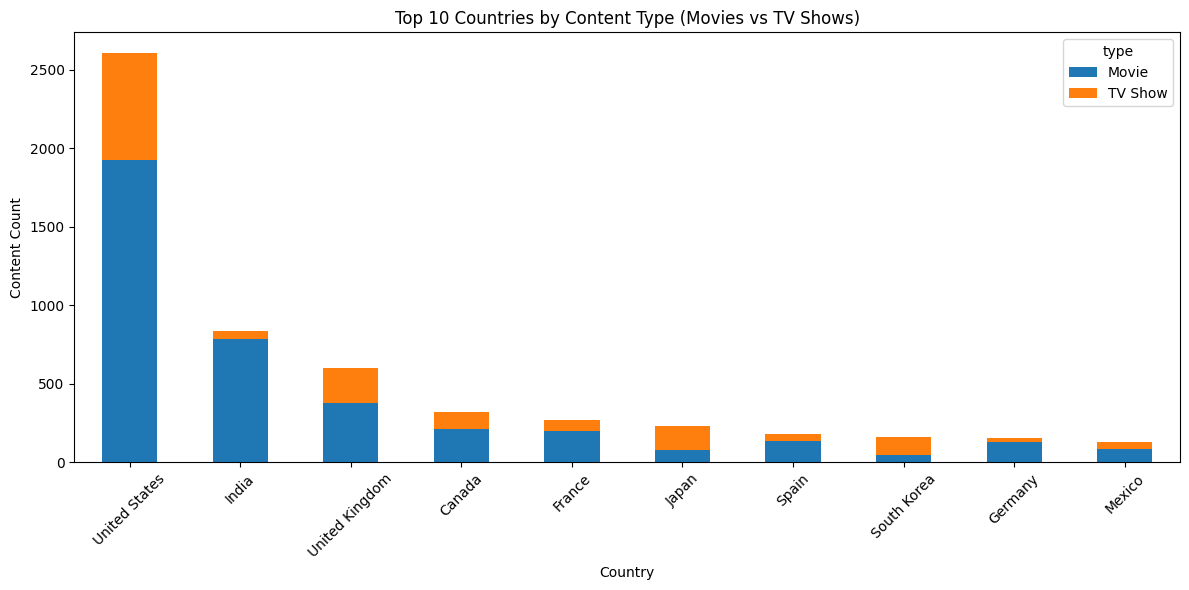

Country vs Release Year Analysis:
 release_year  1942.0  1943.0  1944.0  1945.0  1946.0  1947.0  1954.0  1955.0  \
country                                                                        
Afghanistan        0       0       0       0       0       0       0       0   
Albania            0       0       0       0       0       0       0       0   
Argentina          0       0       0       0       0       0       0       0   
Armenia            0       0       0       0       0       0       0       0   
Australia          0       0       0       0       0       0       0       0   
...              ...     ...     ...     ...     ...     ...     ...     ...   
Vatican City       0       0       0       0       0       0       0       0   
Venezuela          0       0       0       0       0       0       0       0   
Vietnam            0       0       0       0       0       0       0       0   
West Germany       0       0       0       0       0       0       0       0   
Zimba

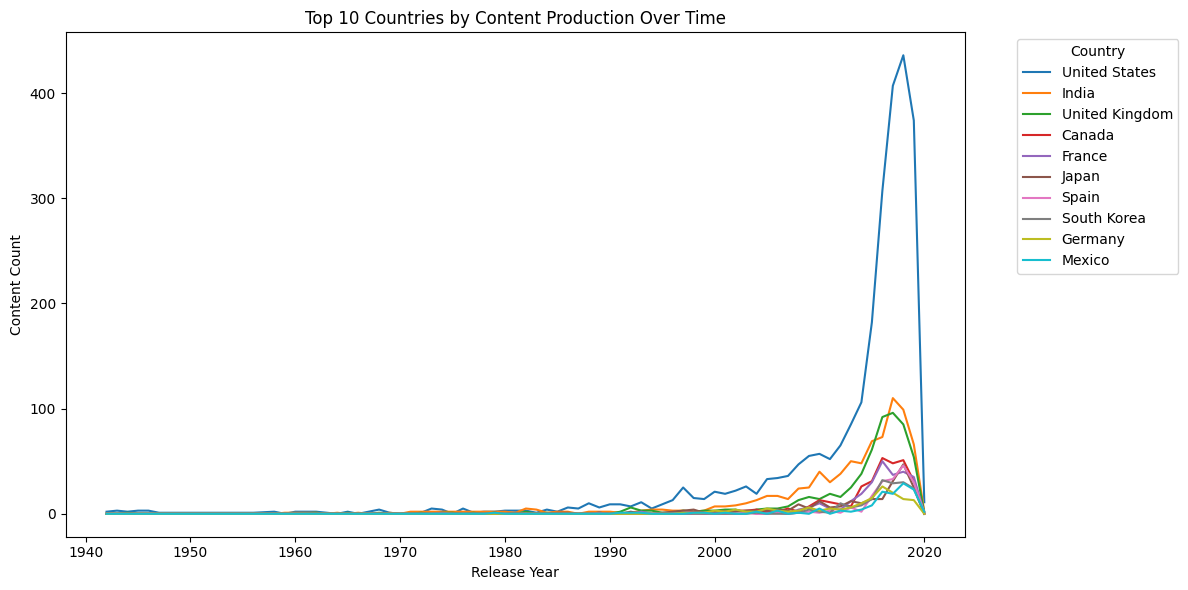

Country vs Rating Analysis:
 rating        G  NC-17  NR  PG  PG-13   R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
country                                                                      
Afghanistan   0      0   0   0      0   0      0     0      1      0     0   
Albania       0      0   0   0      0   0      0     0      1      0     0   
Argentina     1      0   5   0      1   2      7     3     45      3     1   
Armenia       0      0   0   0      0   0      0     0      1      0     0   
Australia     0      0   7  10      9  14     20     7     28     16     6   
...          ..    ...  ..  ..    ...  ..    ...   ...    ...    ...   ...   
Vatican City  0      0   0   1      0   0      0     0      0      0     0   
Venezuela     0      0   1   0      0   0      2     0      0      0     0   
Vietnam       0      0   0   0      0   0      2     0      2      0     0   
West Germany  1      0   0   0      0   0      2     0      2      0     0   
Zimbabwe      0      0   1   0     

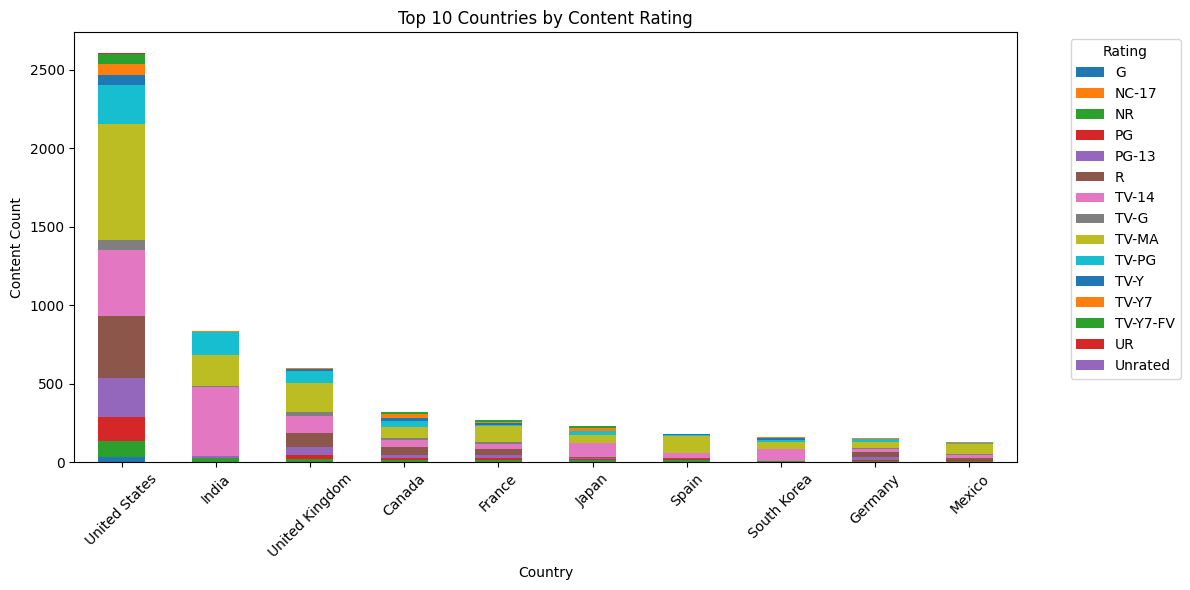

Country vs Genre Analysis:
 listed_in     Action & Adventure  Anime Features  Anime Series  \
country                                                          
Afghanistan                    0               0             0   
Albania                        0               0             0   
Argentina                      3               0             0   
Armenia                        0               0             0   
Australia                     10               0             0   
...                          ...             ...           ...   
Vatican City                   0               0             0   
Venezuela                      0               0             0   
Vietnam                        2               0             0   
West Germany                   0               0             0   
Zimbabwe                       0               0             0   

listed_in     British TV Shows  Children & Family Movies  Classic & Cult TV  \
country                           

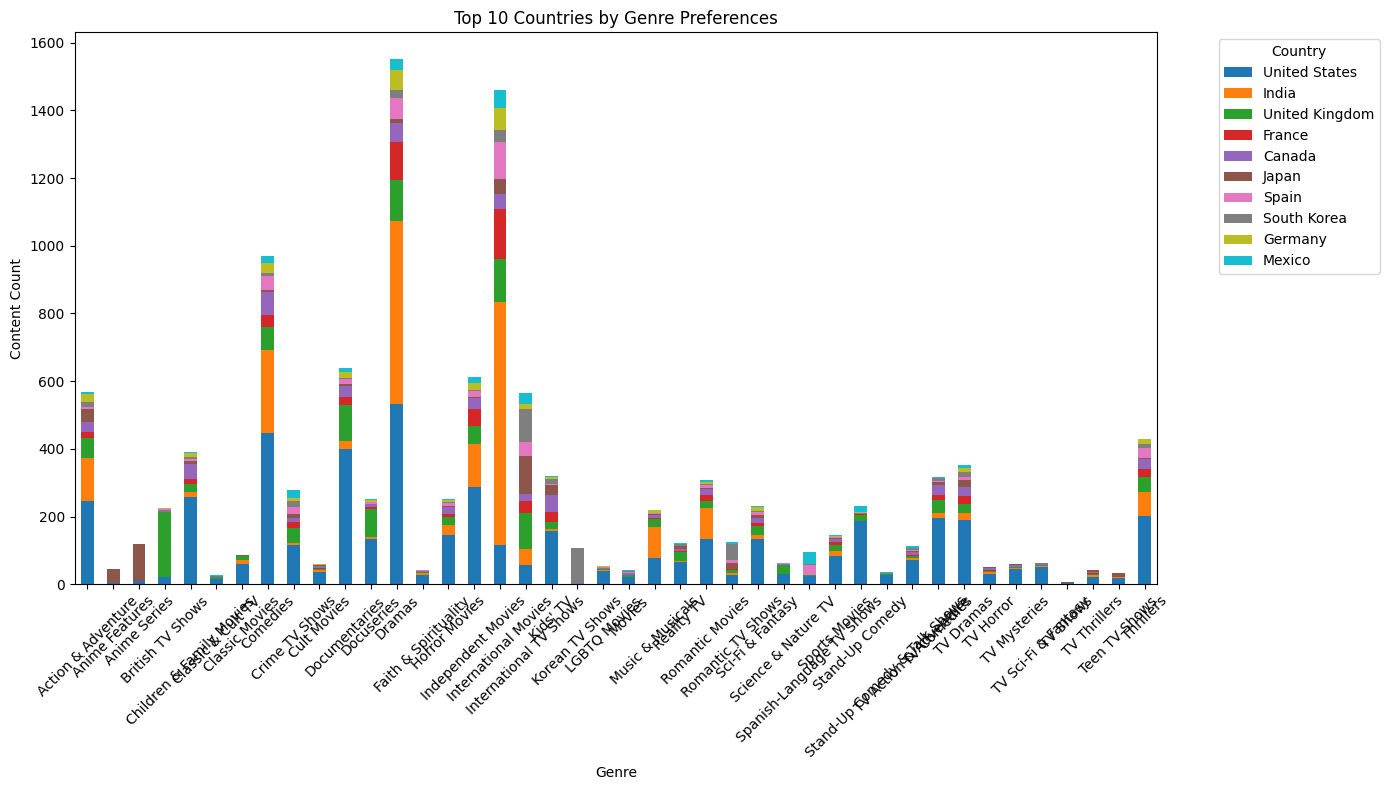

In [ ]:
country_data = netflix_df['country'].dropna().apply(lambda x: x if isinstance(x, list) else x.strip("[]").replace("'", "").split(", ")).explode()

# Analysis 1: Country vs Type
country_type_data = netflix_df[['type']].join(country_data).dropna()
country_type_counts = country_type_data.groupby(['country', 'type']).size().unstack(fill_value=0)
print("Country vs Type Analysis:\n", country_type_counts)

#  top 10 countries by content type
top_countries_by_type = country_type_counts.sum(axis=1).nlargest(10).index
country_type_counts.loc[top_countries_by_type].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Top 10 Countries by Content Type (Movies vs TV Shows)")
plt.xlabel("Country")
plt.ylabel("Content Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analysis 2: Country vs Release Year
country_year_data = netflix_df[['release_year']].join(country_data).dropna()
country_year_counts = country_year_data.groupby(['country', 'release_year']).size().unstack(fill_value=0)
print("Country vs Release Year Analysis:\n", country_year_counts)

#  top 10 countries by content production over time
top_countries_by_content = country_year_counts.sum(axis=1).nlargest(10).index
country_year_counts.loc[top_countries_by_content].T.plot(figsize=(12, 6))
plt.title("Top 10 Countries by Content Production Over Time")
plt.xlabel("Release Year")
plt.ylabel("Content Count")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analysis 3: Country vs Rating
country_rating_data = netflix_df[['rating']].join(country_data).dropna()
country_rating_counts = country_rating_data.groupby(['country', 'rating']).size().unstack(fill_value=0)
print("Country vs Rating Analysis:\n", country_rating_counts)

#  top 10 countries by content rating
top_countries_by_rating = country_rating_counts.sum(axis=1).nlargest(10).index
country_rating_counts.loc[top_countries_by_rating].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Top 10 Countries by Content Rating")
plt.xlabel("Country")
plt.ylabel("Content Count")
plt.xticks(rotation=45)
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Country vs Genre (listed_in)
country_genre_data = netflix_df[['listed_in']].join(country_data).dropna()
country_genre_data['listed_in'] = country_genre_data['listed_in'].apply(lambda x: x if isinstance(x, list) else x.strip("[]").replace("'", "").split(", ")) # Keep lists as they are; modify only strings
country_genre_counts = country_genre_data.explode('listed_in').groupby(['country', 'listed_in']).size().unstack(fill_value=0)
print("Country vs Genre Analysis:\n", country_genre_counts)

# top 10 countries by genre preferences
top_countries_by_genre = country_genre_counts.sum(axis=1).nlargest(10).index
country_genre_counts.loc[top_countries_by_genre].T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Top 10 Countries by Genre Preferences")
plt.xlabel("Genre")
plt.ylabel("Content Count")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


From the chart of Netflix content distribution by country, there are 3 key insights:

1. The US completely dominates with the amount of content (both movies and TV shows) surpassing India - the second country.

2. Movies (blue) account for a larger proportion than TV Shows (orange) in all countries, indicating that Netflix focuses more on movies.

3. The top 3 countries (US, India, UK) account for the majority of content, while the remaining countries have a modest and similar amount of content.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico')])

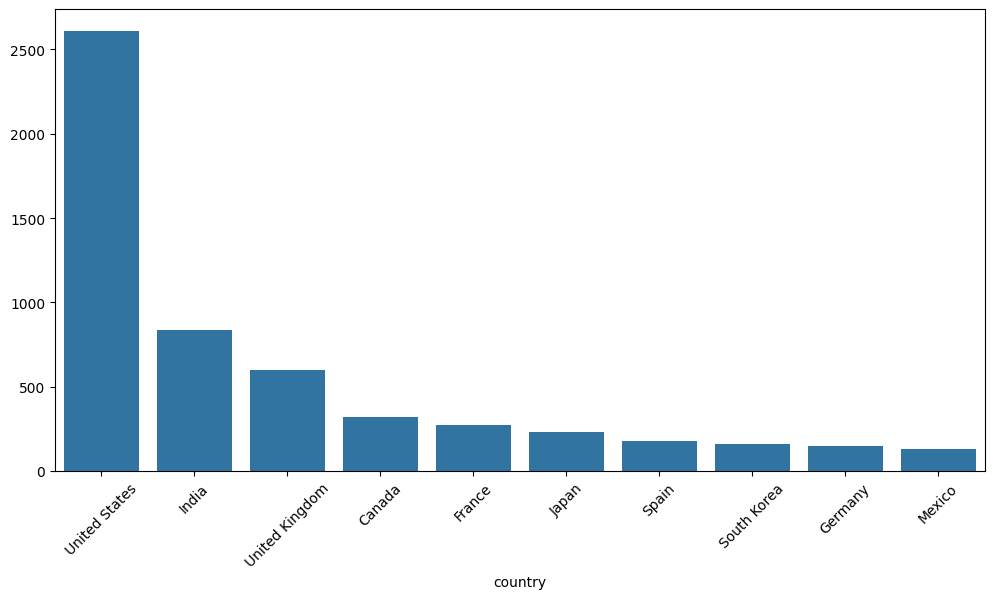

In [ ]:
# Top 10 countries by titles
netflix_df['country'] = netflix_df['country'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
netflix_df_clean = netflix_df.dropna(subset=['country'])
netflix_df_clean['country'] = netflix_df_clean['country'].apply(lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else [])
directors_exploded = netflix_df_clean.explode('country')
directors_exploded['country'].value_counts().head(10)
# visualize top 10:
plt.figure(figsize=(12, 6))
sns.barplot(x=directors_exploded['country'].value_counts().head(10).index, y=directors_exploded['country'].value_counts().head(10).values)
plt.xticks(rotation=45)










































































































































The bar chart shows the distribution of Netflix content by country, with the** United States** leading by a large margin, followed by **India** and the **United Kingdom**. This suggests that Netflix’s content library is heavily dominated by U.S.-produced content, with significant contributions from a few other countries. Countries like Canada, France, and Japan also have notable but smaller contributions, while other regions are less represented.

Netflix could focus on **expanding its content from underrepresented regions** to appeal to a more **global audience**. Increasing content from countries with smaller contributions, such as **South Korea, Germany, and Mexico,** could attract viewers from these regions and **diversify Netflix’s catalog**. Additionally, **highlighting and promoting international content** could engage viewers interested in **foreign stories and cultures**, helping to broaden Netflix’s appeal beyond its U.S.-centric library. This approach would support Netflix’s strategy of becoming **a global streaming platform with diverse**, culturally rich content.